In [ ]:
#prepare a priction model for predicting price column

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [3]:
df=pd.read_csv("F:\\excelR\\Toyoto_Corrola.csv")
df

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [4]:
df=df.iloc[:,2:]

In [5]:
df

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Cylinders  1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [7]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
df.corr()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


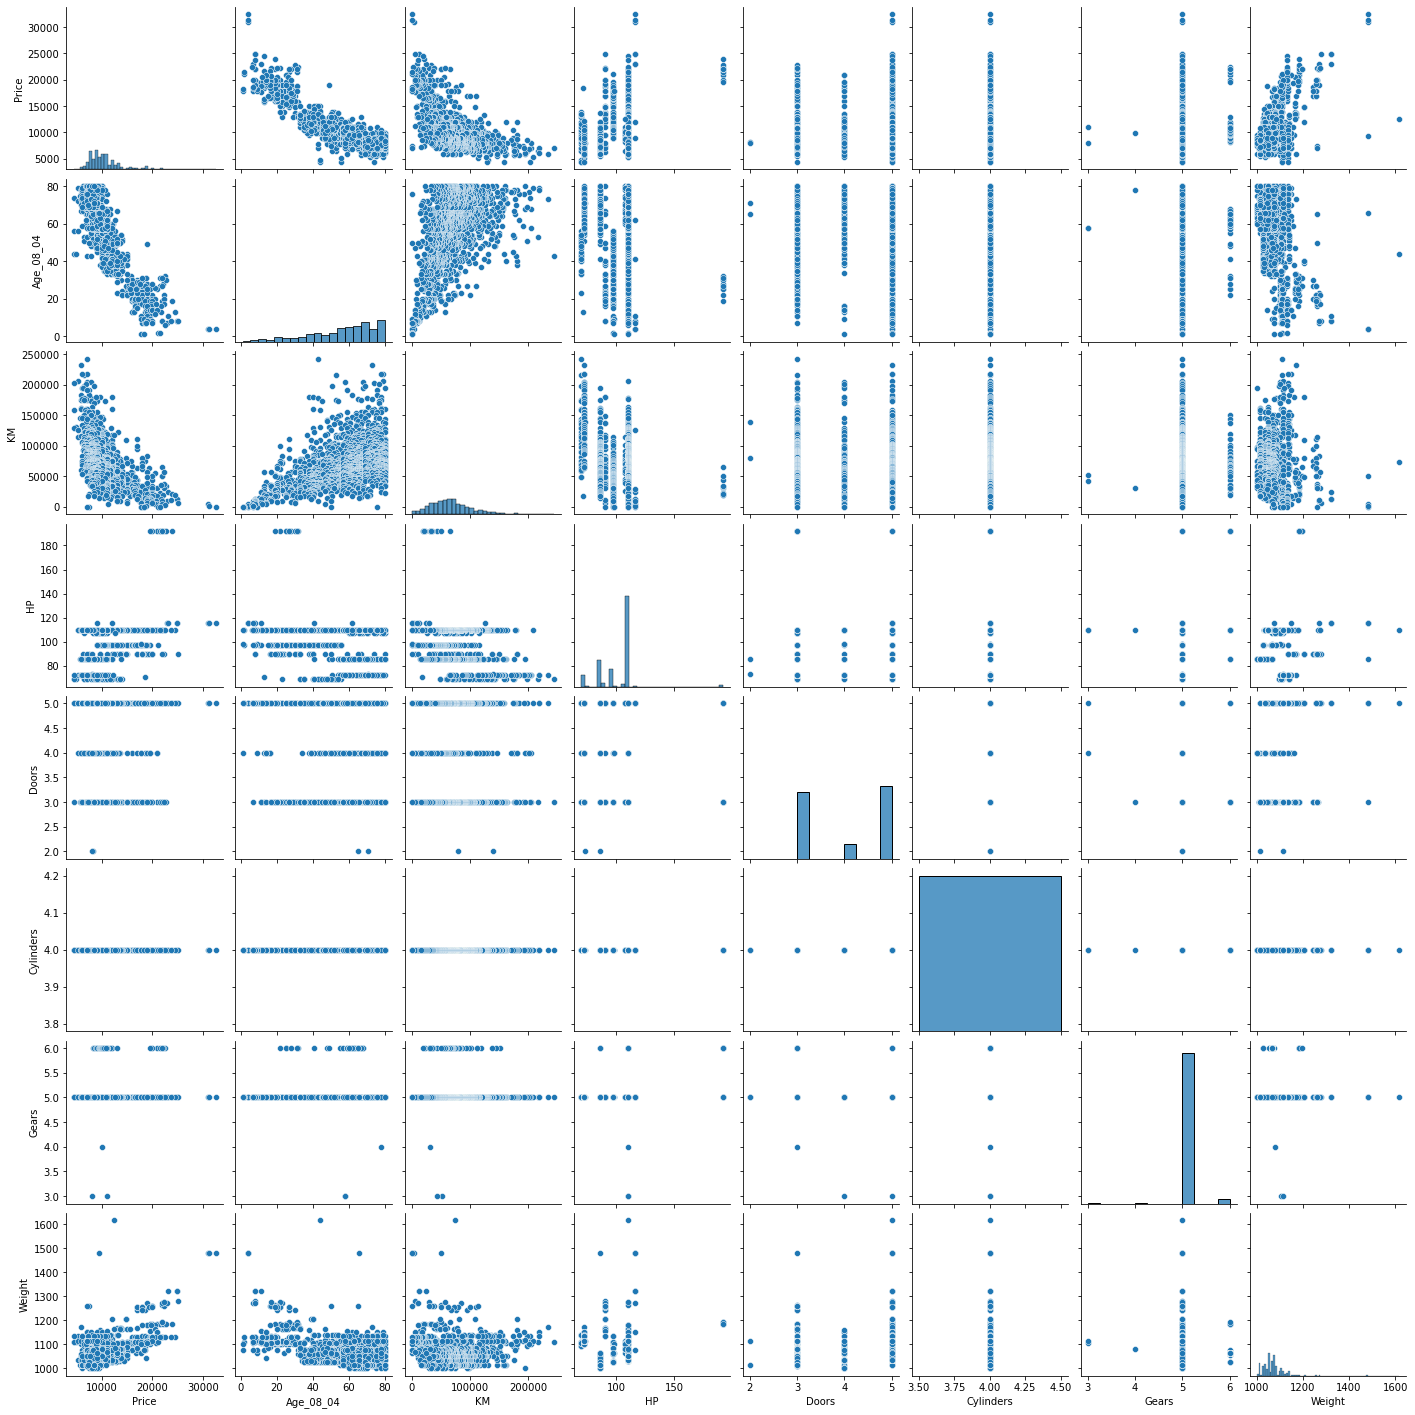

In [9]:
sns.pairplot(df)

In [10]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight', data=df).fit()

In [11]:
model.params

Intercept    -410.845504
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [12]:
model.pvalues

Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Cylinders     1.181900e-07
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64

In [13]:
(model.rsquared,model.rsquared_adj)

(0.8628024511073658, 0.8622263942190832)

In [14]:
ml_d=smf.ols('Price~Doors', data=df).fit()
print(ml_d.pvalues)

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [15]:
ml_g=smf.ols('Price~Gears',data = df).fit()
print(ml_g.pvalues)

Intercept    0.069804
Gears        0.016775
dtype: float64


In [16]:
ml_dg=smf.ols('Price~Doors+Gears',data=df).fit()
print(ml_dg.pvalues)

Intercept    5.532851e-01
Doors        3.352637e-14
Gears        2.849576e-04
dtype: float64


In [17]:
#'Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight'
rsq_a=smf.ols('Age_08_04~KM+HP+Doors+Cylinders+Gears+Weight', data=df).fit().rsquared
vif_a=1/(1-rsq_a)
rsq_k=smf.ols('KM~Age_08_04+HP+Doors+Cylinders+Gears+Weight', data=df).fit().rsquared
vif_k=1/(1-rsq_k)
rsq_h=smf.ols('HP~Age_08_04+KM+Doors+Cylinders+Gears+Weight',data=df).fit().rsquared
vif_h=1/(1-rsq_h)
rsq_d=smf.ols('Doors~Age_08_04+KM+HP+Cylinders+Gears+Weight', data=df).fit().rsquared
vif_d=1/(1-rsq_d)
rsq_c=smf.ols('Cylinders~Age_08_04+KM+HP+Doors+Gears+Weight', data=df).fit().rsquared
vif_c=1/(1-rsq_c)
rsq_g=smf.ols('Gears~Age_08_04+KM+HP+Doors+Cylinders+Weight', data=df).fit().rsquared
vif_g=1/(1-rsq_g)
rsq_w=smf.ols('Weight~Age_08_04+KM+HP+Doors+Cylinders+Gears', data=df).fit().rsquared
vif_w=1/(1-rsq_w)
d1={'variables':['Age_08_04','KM','HP','Doors','Cylinders','Gears','Weight'], 'VIF':[vif_a,vif_k,vif_h,vif_d,vif_c,vif_g,vif_w]}
d1_frame=pd.DataFrame(d1)
d1_frame

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,Age_08_04,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Cylinders,0.000000
5,Gears,1.096501
6,Weight,1.508041


# cooks distance

In [18]:
model_influence= model.get_influence()
(c,_)= model_influence.cooks_distance

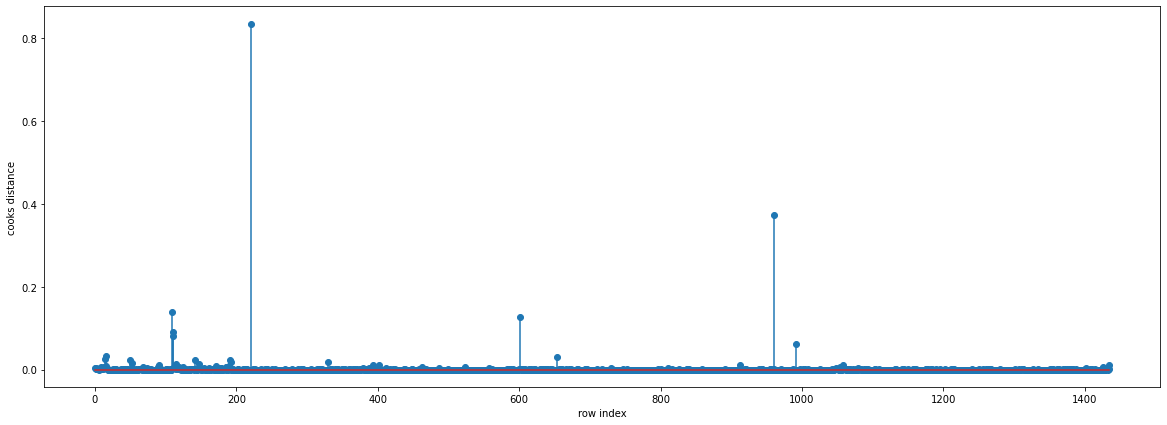

In [19]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)), np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [20]:
(np.argmax(c),np.max(c))

(221, 0.8359007508853545)

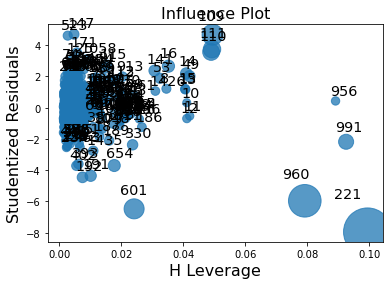

In [21]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [22]:
df[df.index.isin([960,221])]

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
221,12450,44,74172,110,5,4,5,1615
960,9390,66,50806,86,3,4,5,1480


In [23]:
df.head(10)

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
5,12950,32,61000,90,3,4,5,1170
6,16900,27,94612,90,3,4,5,1245
7,18600,30,75889,90,3,4,5,1245
8,21500,27,19700,192,3,4,5,1185
9,12950,23,71138,69,3,4,5,1105


# improving the model

In [26]:
df_new=df

In [27]:
df_new

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [28]:
df1=df_new.drop(df_new.index[[960,221]],axis=0).reset_index()

In [29]:
df1

,index,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,0,13500,23,46986,90,3,4,5,1165
1,1,13750,23,72937,90,3,4,5,1165
2,2,13950,24,41711,90,3,4,5,1165
3,3,14950,26,48000,90,3,4,5,1165
4,4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...
1429,1431,7500,69,20544,86,3,4,5,1025
1430,1432,10845,72,19000,86,3,4,5,1015
1431,1433,8500,71,17016,86,3,4,5,1015
1432,1434,7250,70,16916,86,3,4,5,1015


In [31]:
final_ml_d=smf.ols('Price~Age_08_04+KM+HP+Cylinders+Gears+Weight',data=df1).fit()
final_ml_d

In [32]:
(final_ml_d.rsquared,final_ml_d.aic)

(0.8726263626033617, 24633.77225172694)

In [33]:
final_ml_g=smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Weight',data=df1).fit()

In [34]:
(final_ml_g.rsquared,final_ml_g.aic)

(0.8719992117277906, 24640.815526801816)

### comparing r square value and aic value of doors and gears, doors have higher r sqaure value and lower aic value so include the doors variable